In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import os

In [5]:
for dirname, _, filenames in os.walk('./dataset/CalCOFI'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./dataset/CalCOFI/bottle.csv


## Exploratory Analysis

In [6]:
bottle = pd.read_csv("./dataset/CalCOFI/bottle.csv")
bottle.head(2)

/var/folders/wd/kpmqk46j1wq467f_h9w8l5440000gn/T/ipykernel_656/3850043050.py:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  bottle = pd.read_csv("./dataset/CalCOFI/bottle.csv")


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.44,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.44,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
bottle.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587269,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


In [8]:
bottle_df = bottle[['Salnty', 'T_degC', 'Depthm', 'O2ml_L', 'STheta', 'O2Sat']]
# How many null values we have
print(bottle_df.isnull().sum())
# Drop rows with missing values (if any)
bottle_df.dropna(inplace=True)

Salnty     47354
T_degC     10963
Depthm         0
O2ml_L    168662
STheta     52689
O2Sat     203589
dtype: int64


/var/folders/wd/kpmqk46j1wq467f_h9w8l5440000gn/T/ipykernel_656/2353841820.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottle_df.dropna(inplace=True)


<Axes: >

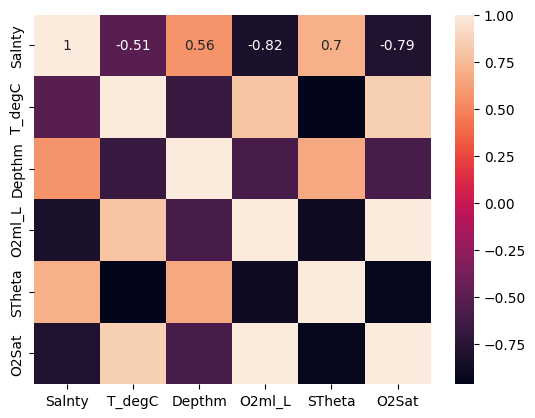

In [9]:
# Correlation Matrix
correlation = bottle_df.corr()
# Plotting the correlation matrix
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

In [10]:
bottle_df_reg = bottle_df[:][:500]      # lets take limit for speed regression calculating
bottle_df_reg.head()

,Salnty,T_degC,Depthm,O2ml_L,STheta,O2Sat
2160,33.030,10.30,0,5.90,25.364,92.8
2161,32.920,18.46,6,6.02,23.568,111.8
2162,32.951,10.29,10,6.04,25.304,95.0
2163,32.990,10.29,15,6.06,25.335,95.3
2164,33.005,10.33,20,6.04,25.339,95.1


/Users/saramariapaguagagonzales/.pyenv/versions/3.11.3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/saramariapaguagagonzales/.pyenv/versions/3.11.3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/saramariapaguagagonzales/.pyenv/versions/3.11.3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/saramariapaguagagonzales/.pyenv/versions/3.11.3/lib/python3.11/site-pack

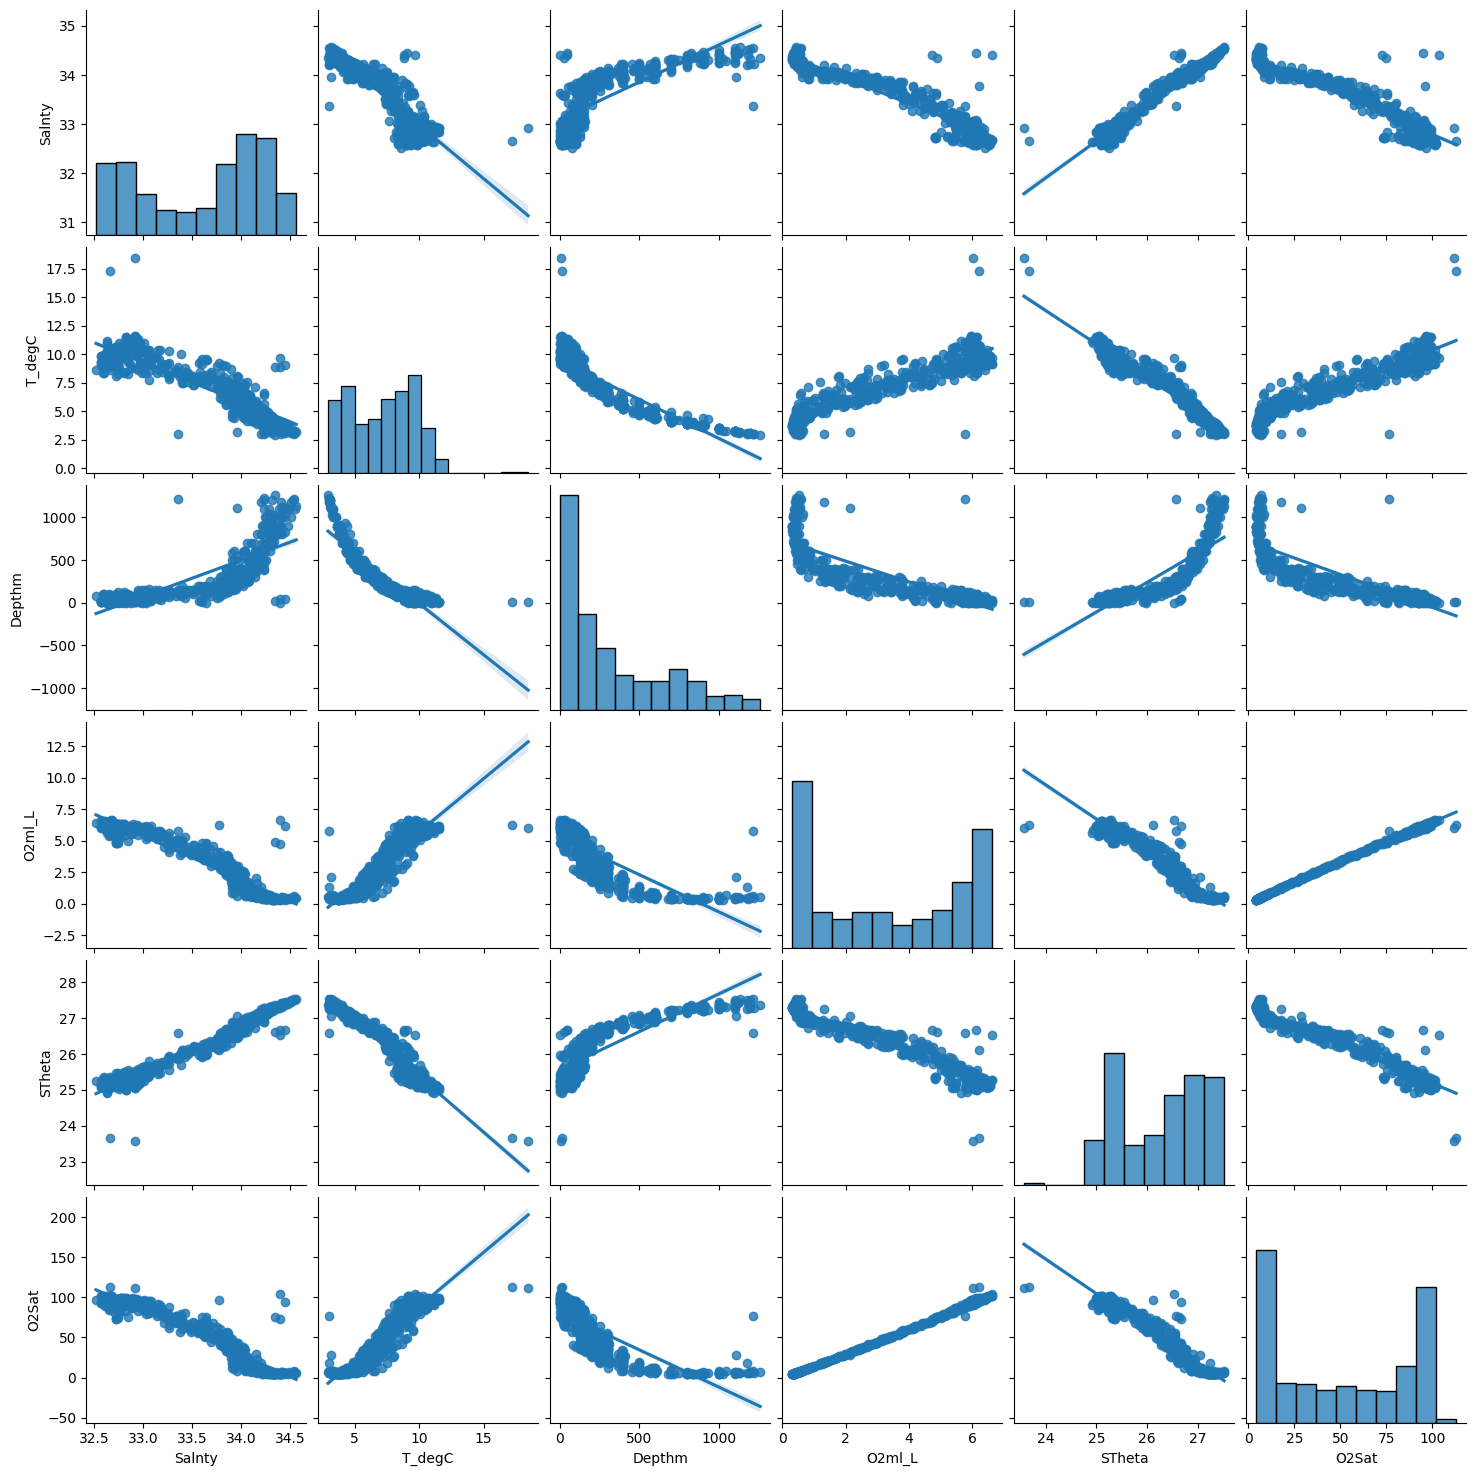

In [11]:
sns.pairplot(bottle_df_reg, kind="reg")

## Simple Ridge Regression

In [12]:
X = bottle_df[['T_degC', 'Depthm', 'O2ml_L', 'STheta', 'O2Sat']]
y = bottle_df['Salnty']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# Initialize the MLPRegressor with some basic parameters
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

# Train the model
mlp.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

In [16]:
# Predict on the test set
y_pred = mlp.predict(X_test)

In [17]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 0.0005392154704440376
R-squared: 0.9974488199493196


## Calibrating the model and improve metrics

In [18]:
options_grid = {
    'hidden_layer_sizes': [(100, 50), (50, 50), (50, 100, 50)],
    'activation': ['tanh', 'relu'],
    'alpha': [0.0001, 0.05, 0.000001]
}

mlpr = MLPRegressor(max_iter=1000, random_state=42)
grid_search = GridSearchCV(mlpr, options_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'activation': 'tanh', 'alpha': 1e-06, 'hidden_layer_sizes': (50, 50)}


In [20]:
# Predict on the test set
new_y_pred = grid_search.predict(X_test)

# Calculate the mean squared error
new_mse = mean_squared_error(y_test, new_y_pred)
print(f'Mean Squared Error: {new_mse}')

# Calculate the R-squared value
new_r2 = r2_score(y_test, y_pred)
print(f'R-squared: {new_r2}')

Mean Squared Error: 2.8949836205207898e-05
R-squared: 0.9974488199493196
